<a href="https://colab.research.google.com/github/yung-gen1us/dap-2024/blob/main/les08/rep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Лабораторная работа №8. Кластеризация**

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

Python version: 3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]
Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0


**1. Импортируйте модель данных "Ирисы Фишера".**

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

print(iris_df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


**2. Выполните нормализацию данных**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_df)
iris_df_scaled = pd.DataFrame(iris_scaled, columns = iris.feature_names)
print(iris_df_scaled.round(3).head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0             -0.901             1.019             -1.340            -1.315
1             -1.143            -0.132             -1.340            -1.315
2             -1.385             0.328             -1.397            -1.315
3             -1.507             0.098             -1.283            -1.315
4             -1.022             1.249             -1.340            -1.315


**3. Постройте модель кластеризации используя алгоритм DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples**

In [ ]:
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 1.5, min_samples = 8).fit(iris_df_scaled)
df_1=iris_df_scaled['petal length (cm)']
df_2=iris_df_scaled['sepal width (cm)']
df_test_2=db_default.fit_predict(iris_df_scaled)
print(df_test_2)



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


**4. Постройте диаграмму рассеяния для признаков "sepal length (cm)" "sepal width (cm)", цвет точек на диаграмме должен быть различным для разных кластеров**

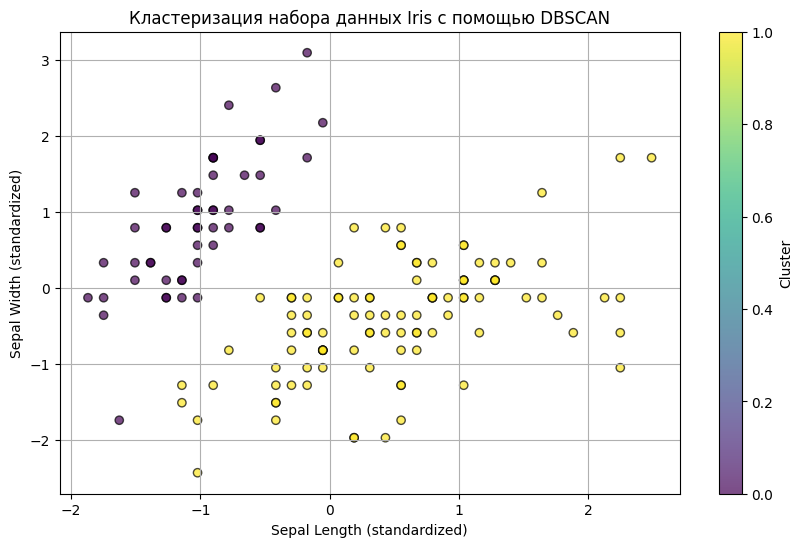

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    iris_df_scaled['sepal length (cm)'],
    iris_df_scaled['sepal width (cm)'],
    c=df_test_2,
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

plt.title("Кластеризация набора данных Iris с помощью DBSCAN")
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Sepal Width (standardized)")
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

**5. Сделайте вывод**

В ходе работы с набором данных "Ирисы Фишера" были выполнены следующие шаги и получены результаты:
+ Использовался встроенный набор данных sklearn.datasets.load_iris, содержащий 150 образцов ирисов с четырьмя признаками: длина и ширина(sepal length, sepal width), длина и ширина(petal length, petal width).
+ Алгоритм DBSCAN был выбран для кластеризации, так как он не требует заранее задавать количество кластеров и способен выделять шумовые точки.
+ Алгоритм выделил два кластера (50 и 100 точек) без шумовых точек при параметрах eps=1.5 и min_samples=8.
+ DBSCAN эффективно справился с задачей, не требуя заранее задавать количество кластеров.

##**Вопросы**
**1. В чем состоит задача кластеризации?**

Задача кластеризации состоит в автоматическом разделении данных на группы (кластеры), при котором объекты внутри одной группы более похожи друг на друга, чем на объекты из других групп.

---
**2. Для каких целей используется кластеризация?**
+ Классификация объектов. Попытка понять зависимости между объектами путем выявления их кластерной структуры. Разбиение выборки на группы схожих объектов упрощает дальнейшую обработку данных и принятие решений, позволяет применить к каждому кластеру свой метод анализа (стратегия «разделяй и властвуй»). В данном случае стремятся уменьшить число кластеров для выявления наиболее общих закономерностей;
+ Сжатие данных. Можно сократить размер исходной выборки, взяв один или несколько наиболее типичных представителей каждого кластера. Здесь важно наиболее точно очертить границы каждого кластера, их количество не является важным критерием;
+ Обнаружение новизны (обнаружение шума). Выделение объектов, которые не подходят по критериям ни в один кластер. Обнаруженные объекты в дальнейшем обрабатывают отдельно.
---
**3. Алгоритм кластеризации Ллойда.**
+ Наиболее простой, но в то же время достаточно неточный метод кластеризации в классической реализации. Он разбивает множество элементов векторного пространства на заранее известное число кластеров k.
+ Действие алгоритма таково, что он стремится минимизировать среднеквадратичное отклонение на точках каждого кластера. Основная идея заключается в том, что на каждой итерации перевычисляется центр масс для каждого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике. Алгоритм завершается, когда на какой-то итерации не происходит изменения кластеров.
---
**4. Как выбрать количество кластеров для алгоритма K-средних**
+ Экспертный метод. Выбор количества кластеров будет зависеть от знания о предметной области (domain knowledge).
+ Метод локтя (elbow method). Мы также можем (1) обучить модель используя несколько вариантов количества кластеров, (2) измерить сумму квадратов внутрикластерных расстояний и (3) выбрать тот вариант, при котором данное расстояние перестанет существенно уменьшаться.
---
**5. Алгоритм DBSCAN**

Алгоритм DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это метод кластеризации, основанный на плотности распределения точек в пространстве. Он выделяет кластеры произвольной формы и способен обнаруживать шумовые точки (выбросы).

*Основные концепции DBSCAN:*
+ Параметры:
  + eps (ε): Радиус окрестности точки. Если расстояние между двумя точками ≤ eps, они считаются соседними.
  + min_samples: Минимальное количество точек в окрестности, чтобы считать область плотной (то есть сформировать кластер).
+ Типы точек:
  + Ядровая точка (Core Point): Точка, в окрестности которой не менее min_samples точек (включая саму себя).
  + Граничная точка (Border Point): Точка, которая не является ядровой, но находится в окрестности ядровой точки.
  + Шумовая точка (Noise Point): Точка, которая не является ни ядровой, ни граничной.


*Преимущества DBSCAN:*
+ Не требует заранее задавать количество кластеров (в отличие от K-means).
+ Находит кластеры произвольной формы (например, не только сферические).
+ Устойчив к шумовым данным (выбросам).

*Недостатки DBSCAN:*
+ Чувствителен к выбору параметров (eps и min_samples).
+ Плохо работает с кластерами разной плотности (может объединять или дробить их).
+ Сложно применять к данным высокой размерности (из-за "проклятия размерности").